Рассмотрим основные моменты не вошедшие в предыдущие лекции

Обновим и подключим библиотеки:

In [154]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

!pip install keras tensorflow

Requirement already up-to-date: pip in /work/Projects/ITMO/data-analysis-and-processing/.venv/lib/python3.6/site-packages (20.1.1)
Requirement already up-to-date: scikit-learn==0.23.0 in /work/Projects/ITMO/data-analysis-and-processing/.venv/lib/python3.6/site-packages (0.23.0)


In [155]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Импортируем датасет MNIST.

In [156]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

Объем тренировочного набора данных:

In [157]:
len(X_train)

60000

Посмотрим, что из себя представляет, например, нулевой объект.

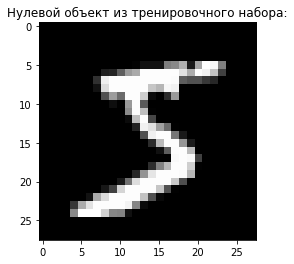

In [158]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

Отклик нулевого объекта из тренировочного набора:

In [159]:
y_train[0]

5

Для разделения данных рекомендуем использовать функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

Для начала преобразуем данные в привычный формат.

In [160]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
# X_test = X_test.reshape(len(X_test), dim)

Уменьшим размерность тестовых данных, выбрав 48 главных компонент

In [161]:
from sklearn.decomposition import PCA

pca = PCA(n_components=34, svd_solver='full')
modelPCA = pca.fit(X_train)
print("#1. var = %f" % sum(pca.explained_variance_ratio_))

X_train = modelPCA.transform(X_train)

#1. var = 0.755498


In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=30)

In [163]:
predictors0=tuple(e[0] for e in X_train)
print("#2: %.2f"%(sum(predictors0)/len(predictors0)))

#2: 0.94


In [164]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=30)
# tree = LogisticRegression(random_state=30)
tree = DecisionTreeClassifier(min_samples_leaf=10,max_depth=20,random_state=30)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

In [165]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(CM[7][7])

1693


Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [166]:
import csv
with open('/home/kirill/Downloads/pred_for_task.csv') as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        if row[0] == "file2":
            print("Label: %d" % int(row[1]))
            test = tuple(float(e) for e in row[2:])
            assert len(test) == 784  # expect 784 predictors

X_test = [test]
X_test = modelPCA.transform(X_test)

Label: 2


In [167]:
y_pred = clf.predict(X_test)
prediction = int(y_pred[0])
print("Prediction: %d" % prediction)
print("Probability: %.3f" % clf.predict_proba(X_test)[0][prediction])

Prediction: 8
Probability: 0.500
